In [26]:
from lambeq import BobcatParser, spiders_reader, stairs_reader, cups_reader, TreeReader, AtomicType, IQPAnsatz
from discopy import grammar, Ty, Word
from pytket.circuit.display import render_circuit_jupyter

In [11]:
sentence = "What the dog doing"

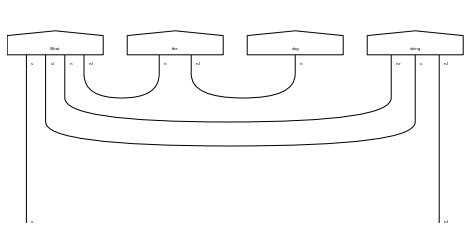

In [12]:
parser = BobcatParser()  # (GALLI TÜECHLI) will download Model so may take a while [1.5 GB]

diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14, 3), fontsize=4)

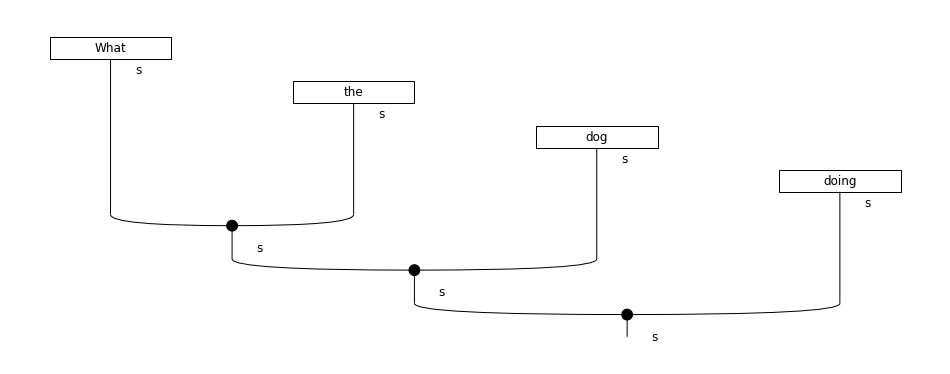

In [14]:
# Create string diagrams based on spiders reader
spiders_diagram = spiders_reader.sentence2diagram(sentence)

# Not a pregroup diagram, we can't use grammar.draw()
spiders_diagram.draw(figsize=(13,5), fontsize=12)

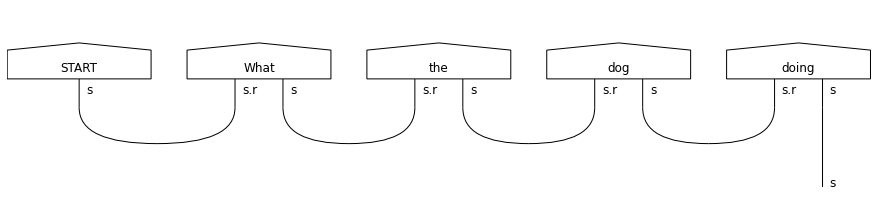

In [16]:
# Create string diagrams based on cups reader
cups_diagram = cups_reader.sentence2diagram(sentence)

grammar.draw(cups_diagram, figsize=(12,3), fontsize=12)

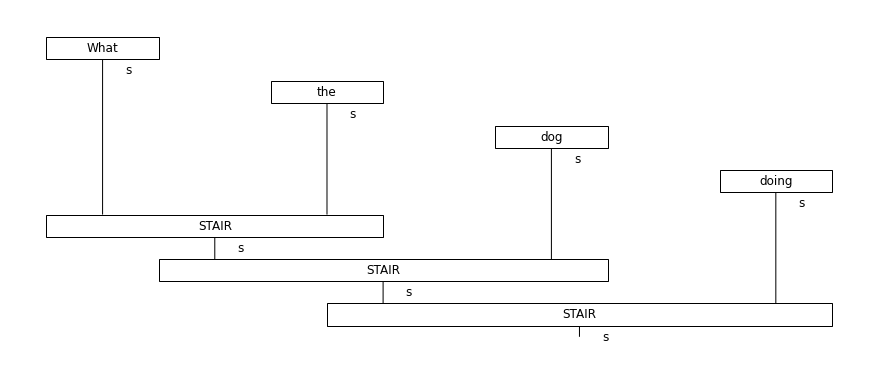

In [17]:
stairs_diagram = stairs_reader.sentence2diagram(sentence)
stairs_diagram.draw(figsize=(12,5), fontsize=12)

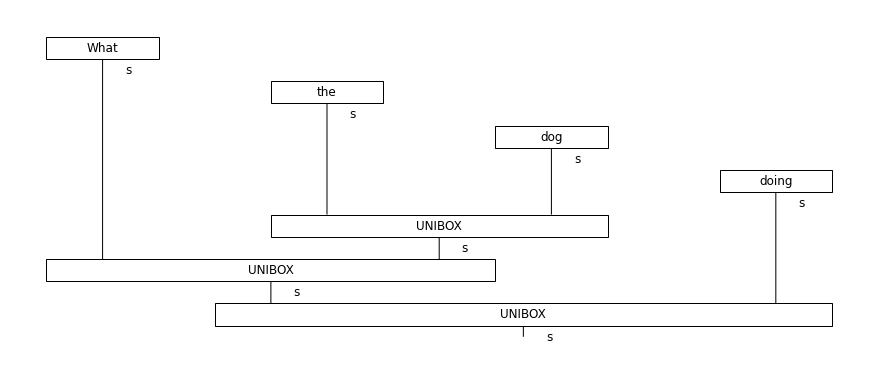

In [19]:
reader = TreeReader()

tree_diagram = reader.sentence2diagram(sentence)
tree_diagram.draw(figsize=(12,5), fontsize=12)

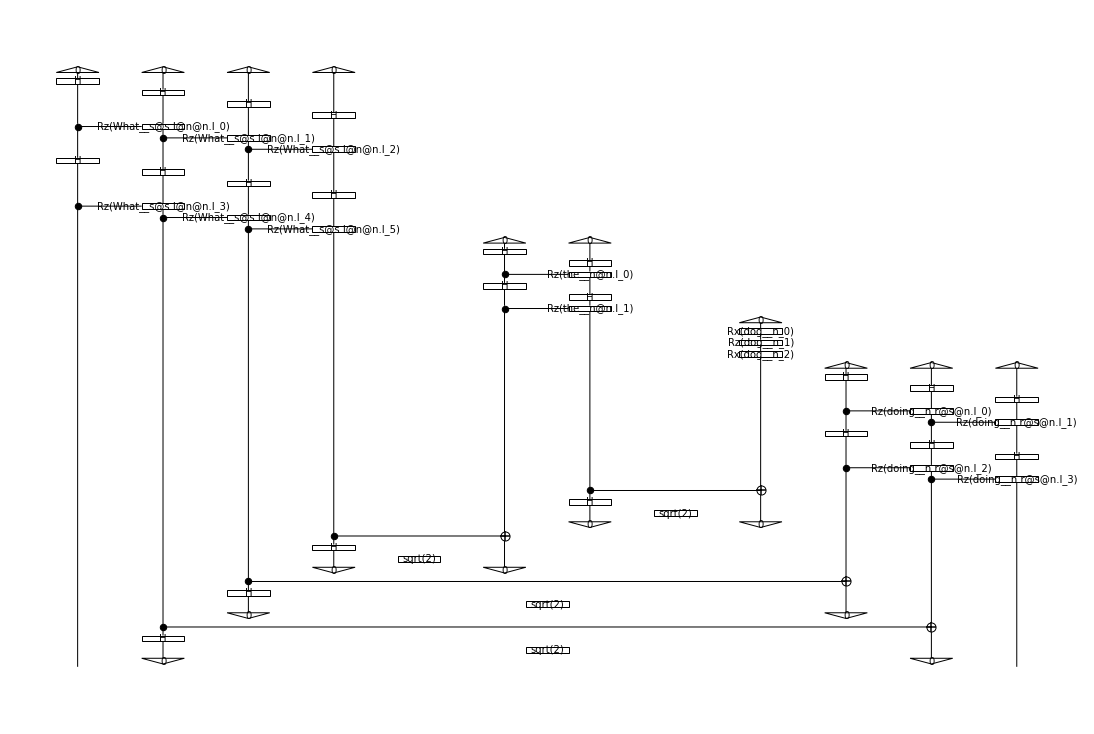

In [25]:
# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

In [27]:
tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [28]:
import numpy as np

In [29]:
BATCH_SIZE = 30
EPOCHS = 3
SEED = 1